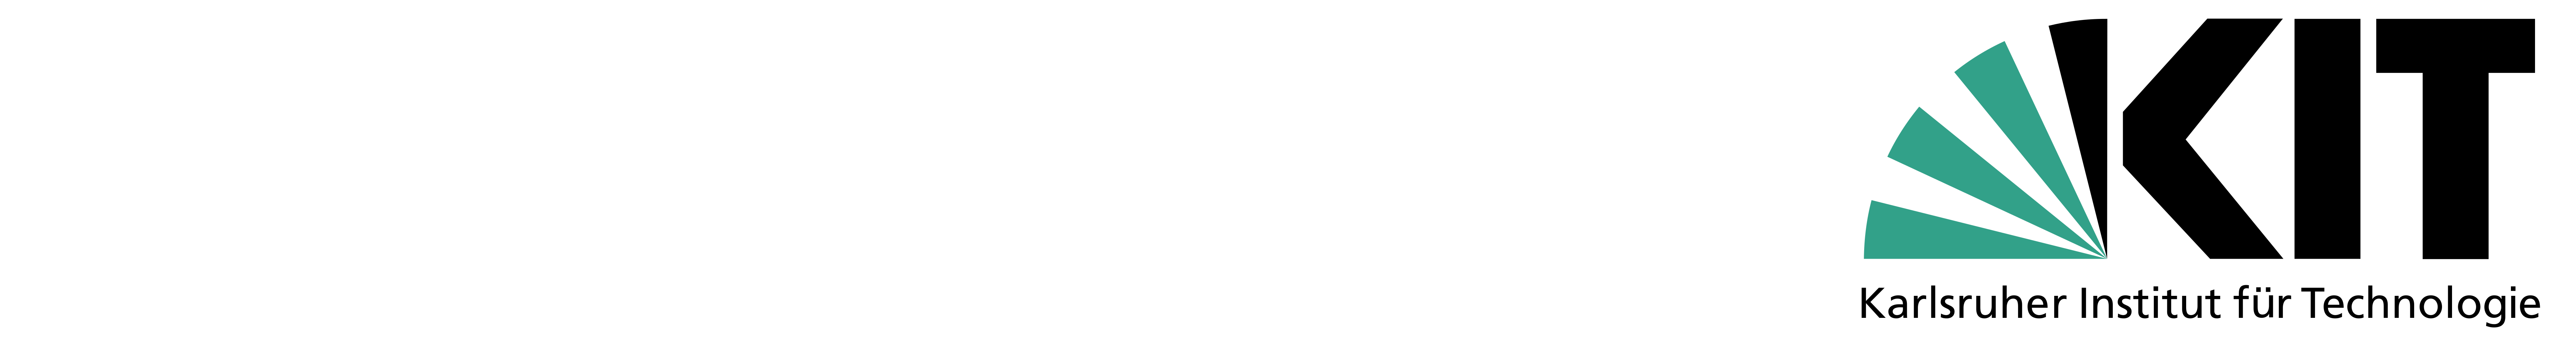

# Introduction to Machine Learning - PROJECT

**Authors:** *Aino Liukkonen (2426731) and Raúl Cruz-Oliver (2429956)*

**Professor:** *Dr. Abdolreza Nazemi*

*This is the project of the course Introduction to Machine Learning. In the following blocks the code to solve the assignement is presented.*

**DESCRIPTION OF THE OBJETIVE OF THE PROJECT:** 

The aim of the project is to create, train and evaluate models using machine learning techniques to predict default of non-default of Real Estate loans.
The given dataset to do so includes a total of 4793 observations with 17 predictor variables. 969 of the samples are default (LOSS) and 3824 non-defaul (PAY).
The dataset, as well as the issued task, was already presented in an article [1], which reference can be found in the Reference block at the end.

**METHODOLOGY:**

The project was coded in Python using the jupyter Notebook environment. Likewise a gitHub repository has been created to allow collaborative work.
<br>
Our decision to use Python arises from two reasons: we were already used to this language and we  learnt some data analysis techniques in this language thanks to the DataCamp courses offered for free with this lecture.
    

### <font color='red'> THIS TWO FOLLOWING CELLS MUST BE RUN BEFORE THE SUBSEQUENT BLOCKS </font> 

*After that one can go directly to the preprocessing data subsection.* <br>
*No need to execute the example.*

In [5]:
#libraries used 

%reset -f

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as sfs 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import statsmodels.api as sm
import itertools
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample

# Our respective DATA folder paths 
data_folder = r'C:\Users\lenovo\Desktop\S7-DE\Introduction to Machine Learning\machine_learning_project\DATA'
#data_folder = r'C:\Users\ainol\OneDrive\Tiedostot\TutaJaOhtu\Machine_Learning\course_project\DATA'

In [497]:
# logistic training coded manually. 
# gradient descent used as optimization technique 

#INCLUDE A PROPER DESCRIPTION OF THE AGLORITHM AND THE SOLVING TECNIQUE PROCEDURES

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_train(theta,X,y):
    
    #parameters of the training 
    epsilon=1.0E-03
    alpha=0.1
    diff=epsilon+1
    theta_old=theta
    c=0
    sh=np.shape(X)
    m=sh[0] #number of observations in the training data
    
    while diff > epsilon:
        theta_old=theta
        error=sigmoid(np.dot(X,theta))-y
        theta = theta_old - (alpha/m)*np.dot(np.transpose(X),error)
        diff = np.linalg.norm(theta_old-theta)
        c=c+1
        if c == 10000:
            print ('Max iteration reached')
            return theta
    return theta

The algorithm is implemented in the vectorized form. The following image shows how to do it.

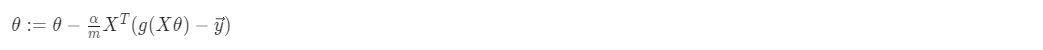

We have lernt to do this thanks to the course offered in Coursera. [3]

## 0. TEST EXAMPLE

**DISCLAIMER: This was not an assigned task.**

It has been decided to include this example, which was used as a way to:

- Get used to python syntax and commands

- Import and process data
 
- Create, train and evaluate models

- Display results

Its execution can be skipped without interfering with the rest of the project.

F-measure: 1.0
Kappa: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



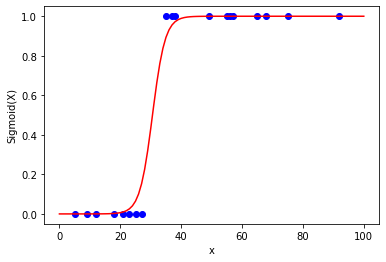

In [50]:
# Import Data
test = pd.read_excel(data_folder + r'\test.xlsx') #once we define the folder, the path is the same
k = 1   #number of predictors, remember theta_0 is for the bias since x_o is always 1
x = test["Age"].array
y = test["Children"].array

# Data preprocessing
sh=np.shape(x)
m=sh[0] #number of observations in the training data

x = x.reshape(-1, 1) 
y = y.reshape(-1, 1) 
ones = np.ones ((m,1)) #for the bias x_0
X = np.concatenate((ones,x),axis=1) #matrix of training data
theta = np.random.rand(k+1,1)

#call to the training function
theta=logistic_train(theta,X,y) 


#trained model visualization
x_graph = np.linspace(0, 100, 101)
x_graph=np.reshape(x_graph, (101,1)) #predictors
ones = np.ones ((101,1)) #for the bias x_0
X_graph = np.concatenate((ones,x_graph),axis=1) #matrix of training data

z_graph = sigmoid(np.dot(X_graph,theta))

plt.plot(x_graph, z_graph, c="red")
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()
plt.scatter(x, y, c="blue")

# Actual class prediction
threshold = 0.5 #limit where sth is clasify as 1 and not anymore as 0
y_predict = sigmoid(np.dot(X,theta))
y_p = np.zeros(m)
for i in range(1,m):
    if y_predict[i]>threshold:
        y_p[i]=1
#y_p contains the final label assignment  

#EVALUATING THE MODEL
#F-MEASURE
print("F-measure:" , metrics.f1_score(y,y_p))
#the closer to 1, the better the performance is
#K-STATISTIC
print("Kappa:",metrics.cohen_kappa_score(y, y_p))
#the closer to 1, the better the performance is
#AREA UNDER CURVE (AUC), FROM RECEIVING OPERATION CHARACTERISTIC (ROC)
print("AUC:",metrics.roc_auc_score(y,y_p))
# if AUC>0.5 it means the classificator is better than a random process. Perfect classificator <=> AUC=1
#other metrics
print(metrics.classification_report(y,y_p))

## 1. ACTUAL DATA IMPORT AND PREPROCESS
Understand dataset and business problem from Cowden et al. (2019).

The data is clearly imbalanced. Thus, **several strategies** can be applied to the training subset (never in the validation subset): <br>

   1. Data set only with the original samples  (Name: pay_loss) <br>
         1a. Using the data as it wasn't imbalance <br>
         1b. Implement stratified split strategies *(NOT IMPLEMENTED)*<br>
         
   2. Undersampling the majority class  (Name: pay_loss_undersampled)<br>
   
   3. Oversampling the minority class  (Name: pay_loss_oversampled)<br>
   
   4. Generating syntethic samples *(NOT IMPLEMENTED)* <br>
    

**DISCLAIMER:**

We have based the features labelling on Exibit 1 from [1]

We found out, contrasting the information stored in the .mat files and in the .xlsx, that the features are not in the order showed in the mentioned reference. Nevetherless, we decided to keep that labelling since at the end it makes no differences in our way of proceeding and issuing the problem. Our task was mainly to process data, leaving secondary position the connection of such data with its physical meaning and interpretation.


In [8]:
#DATA READING

# Read data from LOSS.mat
mat_loss = loadmat(data_folder + r'\LOSS.mat')
loss_matrix = mat_loss['LOSS']
loss_matrix = np.matrix(loss_matrix)
#select only the first  rows
#loss_matrix = loss_matrix[0:900,:] #in case we dont wanna use the whole set
# Convert into a Pandas Data Frame
loss = pd.DataFrame(loss_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

# Read data from PAY.mat
mat_pay = loadmat(data_folder + r'\PAY.mat')
pay_matrix = mat_pay['PAY']
pay_matrix = np.matrix(pay_matrix)
#select only the first rows
#pay_matrix = pay_matrix[0:900,:] #in case we dont wanna use the whole set
# Convert into a Pandas Data Frame
pay = pd.DataFrame(pay_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])


#LABELLING 
# the value of the column represents whether the mortgage has been paid back or defaulted
loss['is_paid'] = 0
pay['is_paid'] = 1


# Concatenate pay and loss data into one DataFrame
data_frames = [pay, loss]
pay_loss_not_stand = pd.concat(data_frames) #used for the plots


#DATA STANDARIZATION
scaler = StandardScaler()
pay_loss_standarized = scaler.fit_transform(pay_loss_not_stand) 

pay_loss_STAND = pd.DataFrame(pay_loss_standarized, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR','is_paid'])

#select the rows according to the standarized labels 
#(remember that the labels now follow a normal distribution centered around 0)
PAY_CORRECT=pay_loss_STAND.is_paid>0
LOSS_CORRECT=pay_loss_STAND.is_paid<0

filtered_PAY = pay_loss_STAND[PAY_CORRECT]
filtered_LOSS = pay_loss_STAND[LOSS_CORRECT]

#relabelling
filtered_PAY.is_paid=1
filtered_LOSS.is_paid=0

data_frames = [filtered_PAY, filtered_LOSS]
pay_loss = pd.concat(data_frames) #concatenated and filtered


#print(pay_loss.shape) 
#17 predictors, 1 label
#4793 observations: 969 LOSS, 3824 PAY

# Separate input features and target
y = pay_loss.is_paid 
X = pay_loss.drop('is_paid', axis=1) 

# setting up testing and training sets, 
# it should be done before any kind of external technique to deal with imbalance, since the way to assess the performance is with actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

#SEVERAL POSIBILITIES FOR THE TRAINING SET

## 1. Imbalance data already stored in pay_loss_imbalanced ##

pay_loss_imbalanced = train  #already suffled due to the spliting for validation

#print(pay_loss_imbalanced.is_paid.value_counts()) #2863 PAY, #731 LOSS

# separate minority and majority classes
loss_train = train[train.is_paid==0] #minority class
pay_train = train[train.is_paid==1]

## 2. Undersampling ##

# downsample majority
pay_train_downsampled = resample(pay_train,
                                replace = False, # sample without replacement
                                n_samples = len(loss_train), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
pay_loss_undersampled = pd.concat([pay_train_downsampled, loss_train])

pay_loss_undersampled = pay_loss_undersampled.sample(frac = 1) #suffle again the data

# checking counts
#print (pay_loss_undersampled.is_paid.value_counts()) #731 PAY, #731 LOSS

## 3. Oversampling ##

# upsample minority
loss_train_upsampled = resample(loss_train,
                          replace=True, # sample with replacement
                          n_samples=len(pay_train), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
pay_loss_oversampled = pd.concat([pay_train, loss_train_upsampled])

pay_loss_oversampled = pay_loss_oversampled.sample(frac = 1) #suffle again the data

#print (pay_loss_oversampled.is_paid.value_counts()) #2863 PAY, #2863 LOSS


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## 2. BIVARIATE RELATIONSHIPS BETWEEN VARIABLES 
We examined the bivariate relationships between the 17 predictors. We execute all the possible pairs.   

Several of the pairs appear to be correlated. 

The following plots illustre the clearest correlations. Besides the plots, the correlation coeficient is included. 

*[the closer to 1, the stronger the positive correlation]*

correlation coeficient: 0.946807249710821


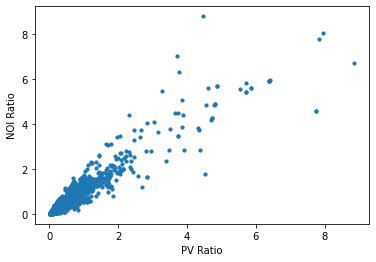

In [499]:
#plt.scatter(pay_loss.Year_Built, pay_loss.IR)
#plt.scatter(pay_loss.ZipPop, pay_loss.CS)
plt.scatter(pay_loss_not_stand.PV_Ratio, pay_loss_not_stand.NOI_Ratio, s=10)
plt.xlabel('PV Ratio')
plt.ylabel('NOI Ratio')

print ('correlation coeficient:',np.corrcoef(pay_loss_not_stand.PV_Ratio, pay_loss_not_stand.NOI_Ratio)[1,0])


correlation coeficient: 0.962149426785957


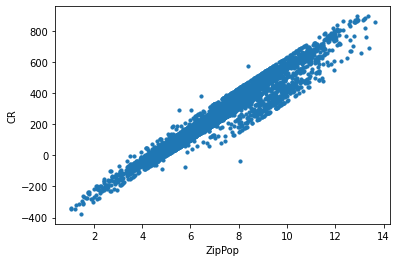

In [500]:
plt.scatter(pay_loss_not_stand.ZipPop, pay_loss_not_stand.CR, s=10)
plt.xlabel('ZipPop')
plt.ylabel('CR')
print ('correlation coeficient:',np.corrcoef(pay_loss_not_stand.ZipPop, pay_loss_not_stand.CR)[1,0])

correlation coeficient: 0.9049789086460073


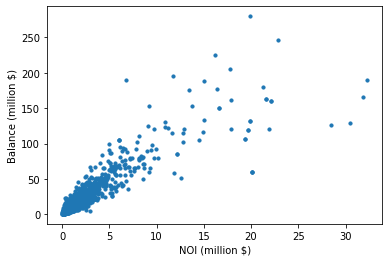

In [501]:
plt.scatter(pay_loss_not_stand.NOI / 10 ** 6 , pay_loss_not_stand.Balance / 10 ** 6, s=10)
plt.xlabel('NOI (million $)')
plt.ylabel('Balance (million $)')
# plt.scatter(pay_loss.NOI, pay_loss.NOI_Ratio) <---  correlated
# plt.scatter(pay_loss.Balance, pay_loss.NOI_Ratio) <---  correlated

print ('correlation coeficient:',np.corrcoef(pay_loss_not_stand.NOI, pay_loss_not_stand.Balance)[1,0])

correlation coeficient: 0.9385681237192982


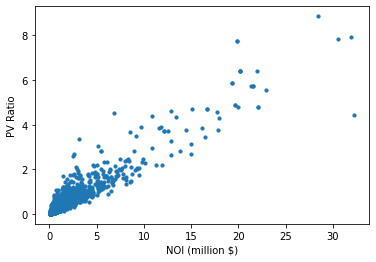

In [502]:
plt.scatter(pay_loss_not_stand.NOI / 10 ** 6 , pay_loss_not_stand.PV_Ratio, s=10)
plt.xlabel('NOI (million $)')
plt.ylabel('PV Ratio')
# --> plt.scatter(pay_loss.Balance, pay_loss.PV_Ratio)  
# and plt.scatter(pay_loss.PV_Ratio, pay_loss.NOI_Ratio) also correlated

print ('correlation coeficient:',np.corrcoef(pay_loss_not_stand.NOI, pay_loss_not_stand.PV_Ratio)[1,0])

correlation coeficient: 0.9939671063692783


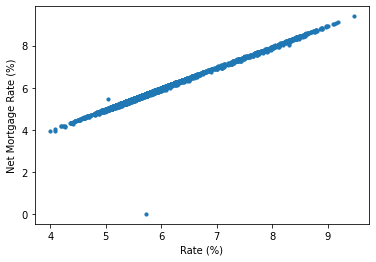

In [503]:
plt.scatter(pay_loss_not_stand.Rate, pay_loss_not_stand.Net_Mortgage_Rate, s=10)
plt.xlabel('Rate (%)')
plt.ylabel('Net Mortgage Rate (%)')

print ('correlation coeficient:',np.corrcoef(pay_loss_not_stand.Rate, pay_loss_not_stand.Net_Mortgage_Rate)[1,0])

## 3. SELECTION OF THE MOST RELEVANT VARIABLES 

In this sections several strategies are implementes so as to find the influence of each variable in the final prediction.

Bearing in mind that we issue a classification problem, we have decided to:

 - use support vector machine as the model to be trained at every stage
 - use the accuracy score as the performance metric

## Forward Stepwise Selection
This techniques propose to begin with the so-called null model, that is to say a model with no variables. From this starting model one variable is added at each step until all variables are there. At each stage the performance of adding any of the remaining variables is tested, the one which leads to the best improvement is added.


In [516]:
# Forward stepwise selection
svm = SVC()

SFS = pay_loss_oversampled
y_train_SFS = SFS.is_paid
X_train_SFS = SFS.drop('is_paid', axis=1)

forward_feature_selection = sfs(svm,
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='accuracy',
                                k_features=17,
                                cv=5)

forward_feature_selection = forward_feature_selection.fit(X_train_SFS, y_train_SFS)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  2.0min finished

[2022-03-03 01:45:42] Features: 1/17 -- score: 0.5960529504561147[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.6min finished

[2022-03-03 01:47:20] Features: 2/17 -- score: 0.6313311537377017[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished

[2022-03-03 01:48:42] Features: 3/17 -- score: 0.6411091550637493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

## Backward Stepwise Selection
This techniques propose to begin with a model with all the variables. From this starting model one variable is deleted at each step until we reach the null model. At each stage the performance of deleting any of the remaining variables is tested, the one which leads to least deterioriation (least useful predictor) is deleted.

In [517]:
# Backward stepwise Regression
svm = SVC()

backward_feature_selection = sfs(svm,
                                forward=False,
                                floating=False,
                                verbose=2,
                                scoring='accuracy',
                                cv=5)

backward_feature_selection = backward_feature_selection.fit(X_train_SFS, y_train_SFS)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.8min finished

[2022-03-03 02:05:04] Features: 16/1 -- score: 0.6996110260103492[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.8min finished

[2022-03-03 02:06:52] Features: 15/1 -- score: 0.7024068527706013[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.7min finished

[2022-03-03 02:08:32] Features: 14/1 -- score: 0.7008354100459544[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

## Best Subset Selection
This technique propose to analyse the performance of every single possible model that can be created with the given predictors. 
The output is simply the best model possible.

In [6]:
# Best subset selection for a specific number of predictors k
def get_best(k, X, y):
    results = []

    # For each combination with a specific k value
    for combo in itertools.combinations(X.columns, k):
        svm = SVC()
        model = svm.fit(X[list(combo)], y)
        predY_svm = svm.predict(X[list(combo)])
        # Calculate Accuracy for the model
        acc = metrics.accuracy_score(y, predY_svm)
        results.append({'model':model, 'Accuracy':acc})

    models = pd.DataFrame(results)
    # The best model is the one with the biggest AUC
    best_model = models.loc[models['Accuracy'].argmax()]

    return best_model

In [ ]:
best = pay_loss_oversampled
y_train_best = best.is_paid
X_train_best = best.drop('is_paid', axis=1)

# Call the get_best() function for each number of predictors k
best_models = pd.DataFrame(columns = ['model', 'Accuracy'])

for i in range(1, 18):
    best_models.loc[i] = get_best(i, X_train_best, y_train_best)

Albeit eventually we have not been able to execute this piece of code, since the algorithm is not fast enough to run in our machines, we properly understood what should be done and what is the concept behind this technique.

## 4. COMPARISON AMONG MODELS

**FORWARD STEPWISE SELECTION:**
The following graph shows the performance at every stage.

We found that from the 13 predictors the performance is not really increased. Therefore it can be said, that predicting only with this amount of variable leads to a enough good performance.

*We could have stated which variables are being used at every step, but taking into account that the labelling is not "rigth" we think is non-sense to present such conclusions*

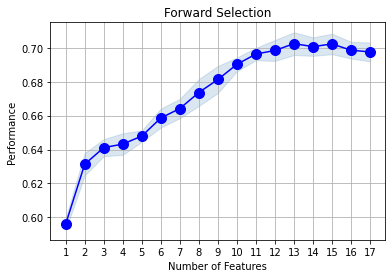

In [518]:
fig = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_err')
plt.title('Forward Selection')
plt.grid()
plt.show()

**BACKWARD STEPWISE SELECTION:** The following graph shows the performance at every stage.

We found that from the 13 predictors the performance is not really increased. Therefore it can be said, that predicting only with this amount of variable leads to a enough good performance.

*We could have stated which variables are being used at every step, but taking into account that the labelling is not "rigth" we think is non-sense to present such conclusions*

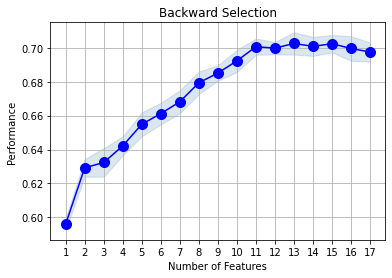

In [519]:
fig = plot_sfs(backward_feature_selection.get_metric_dict(), kind='std_err')
plt.title('Backward Selection')
plt.grid()
plt.show()

**DISCLAIMER**: We would like to mention that we have used accuracy (true predictions/total predictions) as the performance metric. 
However we know that bearning in mind that we are dealing with imbalanced data (although the data set used for this algorithms is the artifially balanced oversampled dataset), and thus other metrics such as F1 or Kappa-stat would be better choices.

**COMMENT:**

Although we found that both strategies (forward and backward) lead us to the same conclusion, 13 predictors are the best deal, we have to bear in mind that maybe they are not the same 13 variables.

_________________________________________________________________

In the followig blocks logistic (5), SVM (6) and neural network (7) classifiers are implemented. We are using the whole set of predictors (k=17).

## 5. IMPLEMENTATION OF THE LOGISTIC REGRESSION WITH THE ACTUAL DATA. 

*There are not actual parameters to tune this classifier*

5726 samples are being considered for the training
The model offers a AUC based on the training data : 0.6917307663016161
Testing the model in the subset reserved for it ->
AUC:  0.6358266511599436
F1:  0.6683544303797467
Accuracy:  56.3 %


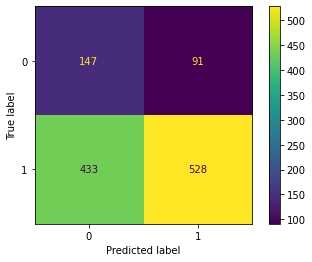

In [112]:
#TRAINING WITH K-FOLD CROSS VALIDATION FOR PARAMETER SELECTION

ManualLogistic = pay_loss_oversampled #select the training data: imbalanced, undersampled, oversampled

#ONLY NEEDED BECAUSE IT IS A HANDMADE ALGORITHM
ManualLogistic['BIAS']=1 # Adding a column to the DataFrames for the independent bias x_o in the literature. 

print(ManualLogistic.shape[0], "samples are being considered for the training")

kf = KFold(n_splits=5)

#print(kf)

#print(kf.split(X))

k=17
threshold = 0.5
AUC=0

y_train_logistic = ManualLogistic.is_paid.to_numpy()
y_train_logistic = y_train_logistic.reshape(-1, 1)    
X_train_logistic = ManualLogistic.drop('is_paid', axis=1).to_numpy()


for train_index, test_index in kf.split(X_train_logistic):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_folded, X_test_folded = X_train_logistic[train_index], X_train_logistic[test_index]
    y_train_folded, y_test_folded = y_train_logistic[train_index], y_train_logistic[test_index]
    #model training and evaluation for every fold
    theta = np.random.rand(k+1,1)
    theta=logistic_train(theta,X_train_folded,y_train_folded)    
    y_p = sigmoid(np.dot(X_test_folded,theta))
    AUC_current=metrics.roc_auc_score(y_test_folded,y_p) #with the likelihood prediction, not with the final class asignement
    if AUC_current>AUC: #just selecting the best out of the total folds 
        AUC=AUC_current
        theta_out=theta
        
#print(theta_out) #parameters of the model
print("The model offers a AUC based on the training data :",AUC)

print("Testing the model in the subset reserved for it ->")

test['BIAS']=1 #just because of the manual implementation
y_test_logistic = test.is_paid.to_numpy()
y_test_logistic = y_test_logistic.reshape(-1, 1)    
X_test_logistic = test.drop('is_paid', axis=1).to_numpy()


y_p_test = sigmoid(np.dot(X_test_logistic,theta))
h_test=y_p_test.shape[0]
y_pre_test = np.zeros(h_test)

for i in range(0,h_test): 
    if y_p_test[i]>0.5: #the threshold can be changed
        y_pre_test[i]=1    
            
print("AUC: ", metrics.roc_auc_score(y_test_logistic,y_p_test))
print("F1: ", metrics.f1_score(y_test_logistic,y_pre_test))
print("Accuracy: ", round(metrics.accuracy_score(y_test_logistic,y_pre_test)*100,2), "%")

cm = metrics.confusion_matrix(y_test_logistic, y_pre_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## 6. SUPPORT VECTOR MACHINE + TUNING ITS PARAMETERS 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

The parameters that can be tuned are:
- regularization parameter: C
- kernel: lineal, poly (and its degree), rbf, sigmoid, precomputed
- independent coeficient for poly and rbf kernels
- others

5726 samples are being considered for the training
1    2863
0    2863
Name: is_paid, dtype: int64
1    961
0    238
Name: is_paid, dtype: int64
F1: 0.7014925373134328
Accuracy:  59.97 %


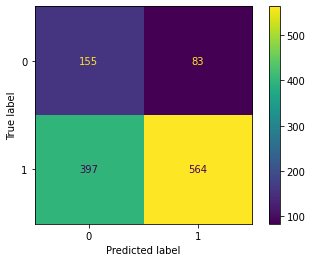

In [520]:
SVM = pay_loss_oversampled #select the training data: imbalanced, undersampled, oversampled

print(SVM.shape[0], "samples are being considered for the training")

print (SVM.is_paid.value_counts())
print (test.is_paid.value_counts())

y_train_SVM = SVM.is_paid
X_train_SVM = SVM.drop('is_paid', axis=1)

#using the same set to evaluate until i manage to tune the parameters somehow, then change to train
y_test_SVM = test.is_paid
X_test_SVM= test.drop('is_paid', axis=1)

svm_model = SVC(kernel='poly', C=1, degree=3, coef0=20)
svm_model.fit(X_train_SVM, y_train_SVM) 

predY_svm_model = svm_model.predict(X_test_SVM)

print('F1:', metrics.f1_score(y_test_SVM,predY_svm_model)) #need label class prediction
print("Accuracy: ", round(metrics.accuracy_score(y_test_SVM,predY_svm_model)*100,2), "%")

cm = metrics.confusion_matrix(y_test_SVM, predY_svm_model)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()




## 7. NEURAL NETWORK + TUNING ITS PARAMETERS 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

The parameters that can be tuned are:
- layers and neurons per layer
- activation function: identity, logistic, tanh, relu
- solver
- others

Also the final prediction based on the last layer output can be manually chosen.

5726 samples are being considered for the training
AUC: 0.632433826808559
F1: 0.7132530120481928
Accuracy: 60.3 %


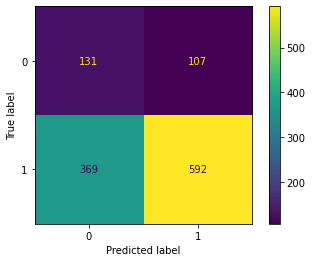

In [9]:
NN = pay_loss_oversampled #select the training data: imbalanced, undersampled, oversampled

print(NN.shape[0], "samples are being considered for the training")

y_train_NN = NN.is_paid
X_train_NN = NN.drop('is_paid', axis=1)

y_test_NN = test.is_paid
X_test_NN = test.drop('is_paid', axis=1)


clf = MLPClassifier(hidden_layer_sizes=(10,10,),activation='relu', solver='adam', random_state=1, max_iter=10000).fit(X_train_NN, y_train_NN)

#print(clf.predict(X_test)) #classification result, class depending of which output neuron fires stronger 

#print(clf.predict_proba(X_test)) #output layer, 2 neurons 

y_predict_p=clf.predict_proba(X_test_NN)

#print(y_predict_p[:,1]) #output of the class '1' neuron, ~probability of estimation

print('AUC:', metrics.roc_auc_score(y_test_NN,y_predict_p[:,1])) #need of probability to compute this metric
print('F1:', metrics.f1_score(y_test_NN,clf.predict(X_test_NN))) #need label class prediction
print('Accuracy:', round(clf.score(X_test_NN, y_test_NN)*100,2),"%") #accuracy=correct predictions/total predictions


plot_confusion_matrix(clf, X_test_NN, y_test_NN)  



## 8. AMONG TECHNIQUES COMPARISION 

Firstly we would like to say that the performance reached by our classifiers are not as good as the one displayed in the refence [1] To improve the performance the following strategies might be considered:
- better understading of the dataset. E.g. actual meaning of the variables (good labelling)
- better preprocessing of data. E.g. other techniques of standarization, new features based on the original ones, other artificial data balancing techniques, etc.
- better tunning of the model parameters. Doing it in a systemic way and keeping track of the results.
- use other algorithms. E.g. random forest, boosting, etc.


The best indicator of the performance of our classifiers is the confusion matrix. All three show that none of the models are performing as expected. 

The validation set is imbalanced, as it undoubtly must be since it represents the reality of observations. Therefore, tuning the parameters we can reach different situations:

- make the model to predict mainly PAY (majority in the validation set), and so some metrics (e.g. accuracy) will be good. Be careful with this. Use F1 or AUC as the indicators.

- make the model to overfit the training set. It performs, as expected, badly on the validation

- try to reach a deal, and make the validation assesment as good as possible (OUR CHOICE)


## 9. GENERAL CONCLUSION + LEARNING OUTCOMES

This project has been an opportunity to:
- work collaborative with other people. Using gitHub and Jupyter Notebook.

- enlarge our knowledge of python libraries such as numpy, pandas and sklearn

- deal with a real data set and all the problems related with it

- implement Machine Learning techniques in a classification problem

- develop the ability to reach agreements even when the performance is not what was expected

- discuss rationally the reasons behind what we observe. 



## REFERENCES

[1] CHAD COWDEN, FRANK J. FABOZZI, AND ABDOLREZA NAZEMI. 2019. Default Prediction of Commercial
Real Estate Properties Using Machine Learning Techniques. In Special Real Estate Issue 2019 - The Journal of  Portfolio Management.

[2] TARA BOYLE. 2019. Methods for Dealing with Imbalanced Data. In https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data.

[3] STANDFORD UNIVERSITY. Machine Learning. In https://www.coursera.org/learn/machine-learning